In [37]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

In [ ]:
rng = Random.default_rng();

### ERO model with small noise

DPP unif


DPP LS


iid unif


iid LS


UST unif


UST LS


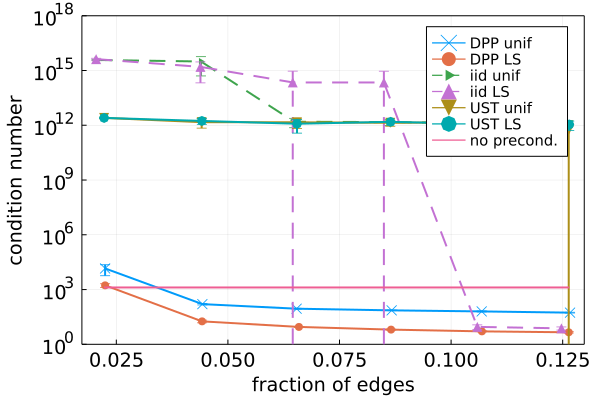

In [42]:
#rng = Random.default_rng();

# graph parameters
n = 100
p = 0.9
eta = 0.001

# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "ERO" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

q = 0.
n_batch = 6
n_rep = 10
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng,q_system=1e-13)

y_limits = (1,1e18)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

### MUN with small noise

DPP unif


DPP LS


iid unif


iid LS


UST unif


UST LS


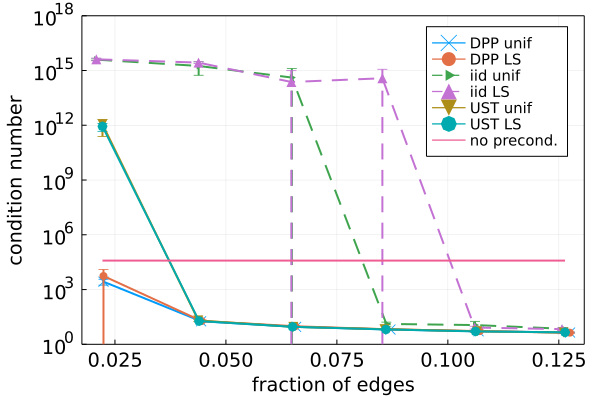

In [36]:
#rng = Random.default_rng();

# graph parameters
n = 100
p = 0.9
eta = 0.01

# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "MUN" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

q = 0.
n_batch = 6
n_rep = 10
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng,q_system=1e-13)

y_limits = (1,1e18)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

### MUN with large noise

DPP unif


DPP LS


iid unif


iid LS


UST unif


UST LS


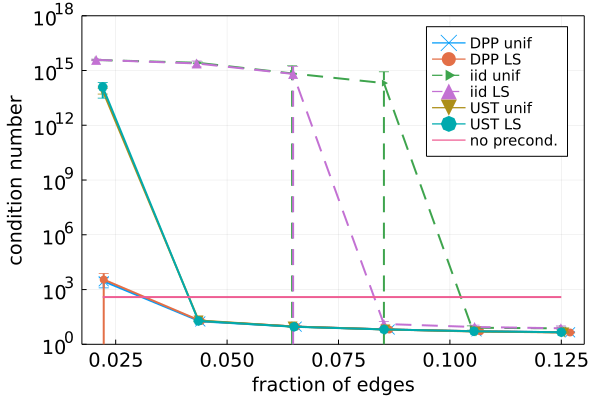

In [34]:
#rng = Random.default_rng();

# graph parameters
n = 100
p = 0.9
eta = 0.1

# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "MUN" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

q = 0.
n_batch = 6
n_rep = 10
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng,q_system=1e-13)

y_limits = (1,1e18)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

0.0010621300801581315DPP unif


DPP LS


iid unif


iid LS


UST unif


UST LS

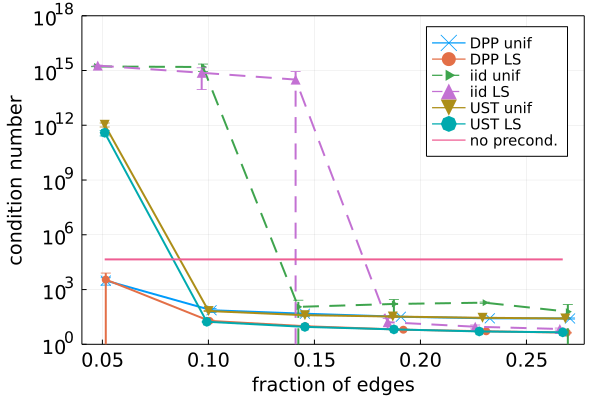

In [49]:
rng = Random.default_rng();
n = 100

planted_score = randperm(rng,n)
eta = 0.
noise = 0.01
p_in = 0.8
p_out = 0.001
meta_g = ero_mun_sbm(rng,n,p_in,p_out,eta,noise;planted_score)

B = magnetic_incidence(meta_g)
Lap = B * B';

l = eigvals(Lap)

println("least eigenvalue: ", l[1])

#gplot(meta_g)

q = 0.
n_batch = 6
n_rep = 3
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng,q_system=1e-13)

y_limits = (1,1e18)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

DPP unif


DPP LS


iid unif


iid LS


UST unif


UST LS


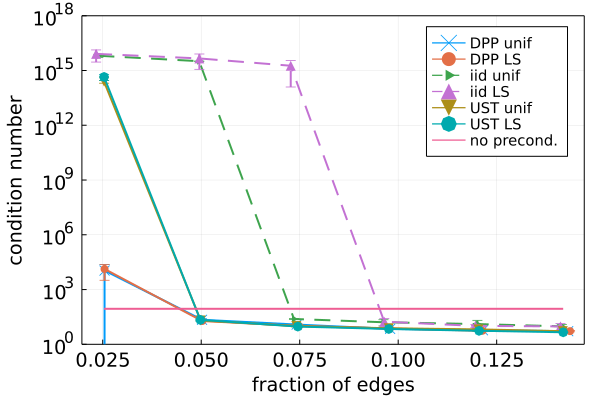

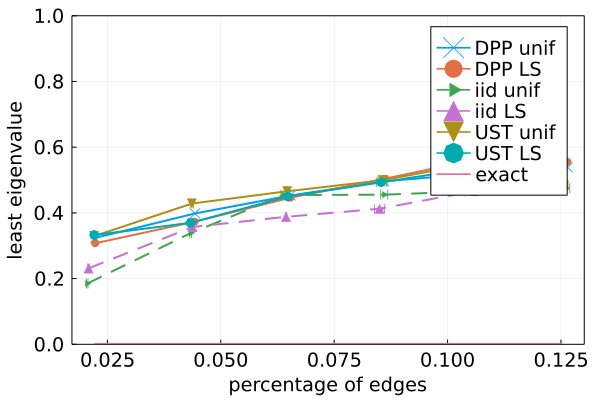

In [6]:
y_limits = (0,1)
metric = "least_eig"
plot_comparison_sync(metric,D_all,y_limits;legendposition=:topright)

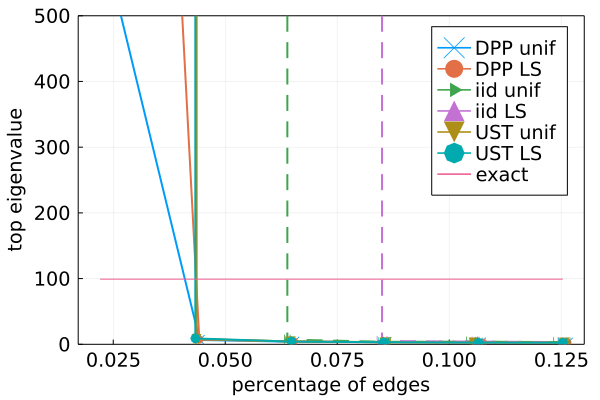

In [7]:
y_limits = (0,500)
metric = "top_eig"
plot_comparison_sync(metric,D_all,y_limits;legendposition=:topright)